<a href="https://colab.research.google.com/github/map72ru/biz_learn/blob/main/NS_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
#import mnist
#import tensorflow as tf
#import tf.kears as keras
import keras
from keras.datasets import fashion_mnist  # наборы для работы
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

ds = fashion_mnist.load_data()


In [20]:
def change_neurons(qnts, ds):

  (train_images,train_labels),(test_images,test_labels)=ds

# Normalize the images.
  train_imagesi = (train_images / 127) - 1
  test_imagesi = (test_images / 127) - 1

# Flatten the images.
  train_images = train_images.reshape((-1, 784))
  test_images = test_images.reshape((-1, 784))  

  model = Sequential()
  model.add(Dense(128, activation='tanh', input_shape=(784,)))
  model.add(Dense(qnts[0], activation='tanh')) # Скрытый слой из 110 нейронов с активацией tanh
  model.add(Dense(qnts[1], activation='tanh')) # Скрытый слой k из 100 нейронов с активацией tanh
  model.add(Dense(10, activation='softmax'))# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  y_t = to_categorical(train_labels)
  y_tt = to_categorical(test_labels)

  model.fit(train_images[:,:], y_t[:,:], epochs=10, batch_size=2048, verbose=0)

  results = model.evaluate(test_images[:,:], y_tt[:,:], batch_size=128)

  return results

In [21]:
print(change_neurons((110, 100), ds))

79/79 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8018
[0.09726002812385559, 0.801800012588501]


Зависимость от количества нейронов в слоях

In [50]:
results = []
qnts = ((30, 20), (40, 30), (50, 40), (75, 65), (100, 90), (125, 115), (150, 140), (175, 165), (200, 190), (200, 100), (200, 50), (100, 125), (125, 150))
for l in qnts:
  results.append(change_neurons(l, ds))

79/79 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 0.7874


In [47]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

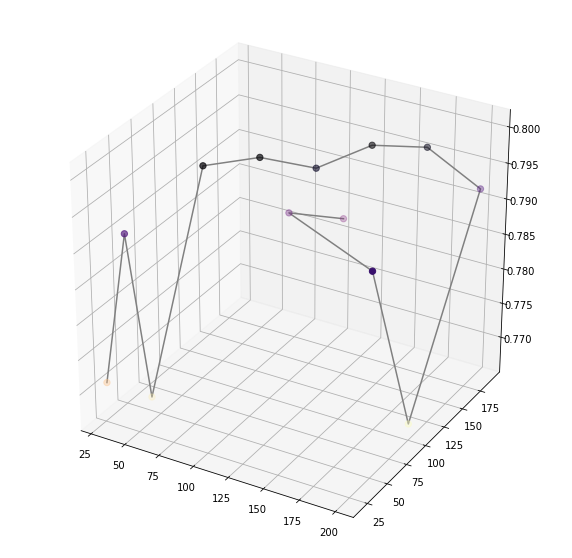

In [55]:
x = []
y = []
z = []
n = 0
for l in qnts:
  x.append(l[0])
  y.append(l[1])
  z.append(results[n][1])
  n += 1

ax = plt.axes(projection='3d')
ax.figure.set_size_inches(10, 10)
ax.plot3D(x, y, z, 'gray')
ax.scatter3D(x, y, z, c=z, s=40, cmap='magma_r');

Существует определенный баланс между количеством нейронов в слоях. Слишком много не повышает производительность, как и не достаточное количество. Так же можно сделать вывод о том, что количество нейронов во втором слое должно быть больше чем в первом, но не значительно.

In [80]:
def change_layers(qnts, ds):

  (train_images,train_labels),(test_images,test_labels)=ds

# Normalize the images.
  train_imagesi = (train_images / 127) - 1
  test_imagesi = (test_images / 127) - 1

# Flatten the images.
  train_images = train_images.reshape((-1, 784))
  test_images = test_images.reshape((-1, 784))  

  model = Sequential()
  model.add(Dense(128, activation='tanh', input_shape=(784,)))
  for n in range(0, qnts[0]):
    model.add(Dense(qnts[1][n], activation='tanh'))
  model.add(Dense(10, activation='softmax'))# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  y_t = to_categorical(train_labels)
  y_tt = to_categorical(test_labels)

  model.fit(train_images[:,:], y_t[:,:], epochs=10, batch_size=2048, verbose=0)

  results = model.evaluate(test_images[:,:], y_tt[:,:], batch_size=128)

  return results

In [81]:
results = []
data = ((2, (150, 140)), (3, (150, 140, 130)), (5, (150, 140, 130, 120, 110)), (10, (150, 140, 130, 120, 110, 100, 90, 80, 70, 60)))
for l in data:
  results.append(change_layers(l, ds))

79/79 [==============================] - 1s 4ms/step - loss: 0.1149 - accuracy: 0.7584


Можно сделать вывод, что количество слоев более двух для данной задачи избыточно

In [82]:
results = []
data = ((2, (150, 140)), (3, (125, 100, 75)), (5, (100, 75, 50, 40, 30)), (10, (100, 90, 80, 70, 60, 50, 40, 30, 20, 10)))
for l in data:
  results.append(change_layers(l, ds))

79/79 [==============================] - 0s 4ms/step - loss: 0.2674 - accuracy: 0.4691


Уменьшение количество нейронов в слое при увеличении слоев не увеличивают точность

In [86]:
def change_optimizer(optimizer, ds):

  (train_images,train_labels),(test_images,test_labels)=ds

# Normalize the images.
  train_imagesi = (train_images / 127) - 1
  test_imagesi = (test_images / 127) - 1

# Flatten the images.
  train_images = train_images.reshape((-1, 784))
  test_images = test_images.reshape((-1, 784))  

  model = Sequential()
  model.add(Dense(128, activation='tanh', input_shape=(784,)))
  model.add(Dense(110, activation='tanh')) # Скрытый слой из 110 нейронов с активацией tanh
  model.add(Dense(100, activation='tanh')) # Скрытый слой k из 100 нейронов с активацией tanh
  model.add(Dense(10, activation='softmax'))# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  y_t = to_categorical(train_labels)
  y_tt = to_categorical(test_labels)

  model.fit(train_images[:,:], y_t[:,:], epochs=10, batch_size=2048, verbose=0)

  results = model.evaluate(test_images[:,:], y_tt[:,:], batch_size=128)

  return results

In [87]:
results = []
for l in ('SGD', 'Adam', 'RMSProp', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl'):
  results.append(change_optimizer(l, ds))

79/79 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.1000


Выбор оптимизатора сильно вляет на качество работы модели. Для данной задачи лучше всего подходит оптимизатор RMSProp